# No. 1

In [149]:
from skimage import feature
from imutils import paths
import numpy as np
# import argparse
import cv2 as cv
import os
import pandas as pd
from google.colab.patches import cv2_imshow

In [206]:
def preprocess(image, resize_image_size):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Ubah mehjadi grayscale
		image = cv.resize(image, (resize_image_size, resize_image_size)) # Resize gambar menjadi suatu ukuran (default = 128)

		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] # Melakukan thresholding dan mengambil hasil gambar thresholding

		return image

In [207]:
def quantify_image_hog(image): # Histogram of Oriented Gradient features
	features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

	return features

In [208]:
def quantify_image_lbp(image): # Local Binary Pattern features
  features = feature.local_binary_pattern(image, 24, 8, method="uniform")

  (hist, _) = np.histogram(features.flatten(), bins=np.arange(0, 27), range=(0, 26))

  hist = hist.astype("float")
  hist /= (hist.sum() + 1e-7)

  return hist

In [209]:
def load_split(path, resize_image_size, extraction_method):
	image_paths = list(paths.list_images(path))
	data = []
	labels = []

	for image_path in image_paths:
		label = image_path.split(os.path.sep)[-2]

		image = cv.imread(image_path)
		image = preprocess(image, resize_image_size)
		
		if extraction_method == 'hog':
			features = quantify_image_hog(image)
		elif extraction_method == 'lbp':
			features = quantify_image_lbp(image)

		data.append(features)
		labels.append(label)

	return (np.array(data), np.array(labels))

In [154]:
#LOAD DATASET
dataset_dir = '/content/drive/My Drive/Dataset/Images/parkinsons/wave'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

In [155]:
# resize_image_size = 128 # Masing-masing gambar perlu diresize menjadi suatu ukuran yang tetap
# extraction_method = 'hog' # 'lbp' atau 'hog'

In [210]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [157]:

def training(resize_image_size, extraction_method, kernel_type, estimator):
  (feature_train, label_train) = load_split(trainingPath, resize_image_size, extraction_method)
  (feature_test, label_test) = load_split(testingPath, resize_image_size, extraction_method)
  # print("Data loaded!")

  le = LabelEncoder()
  label_train = le.fit_transform(label_train)
  label_test = le.transform(label_test)

  #LOGISTIC REGRESSION
  logreg = LogisticRegression()
  logreg.fit(feature_train, label_train)
  predictions = logreg.predict(feature_test)
  # classification_report(label_test, predictions)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(feature_test, label_test))) # .score() -> Accuracy
  print("F1", f1_score(label_test, predictions, average="macro"))
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  #SVM kernel rbf
  classifier_rbf = SVC(kernel = kernel_type)
  classifier_rbf.fit(feature_train, label_train)
  predictions = classifier_rbf.predict(feature_test)
  # classification_report(label_test, predictions)
  print('Accuracy of SVM on test set: {:.2f}'.format(classifier_rbf.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro"))
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  #RANDOM FOREST
  model = RandomForestClassifier(n_estimators=estimator, random_state=10)
  model.fit(feature_train, label_train)
  predictions = model.predict(feature_test)
  # classification_report(label_test, predictions)
  print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro"))
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))


In [129]:
#untuk logistic regression, saya menggunakan parameter default.

In [158]:
training(128, 'hog', "rbf", 100)

Accuracy of logistic regression classifier on test set: 0.67
F1 0.6651785714285714
Precision 0.6696832579185521
Recall 0.6666666666666666
Accuracy of SVM on test set: 0.73
F1 0.7333333333333333
Precision 0.7333333333333333
Recall 0.7333333333333333
Accuracy of Random Forest on test set: 0.73
F1 0.7321428571428572
Precision 0.7375565610859729
Recall 0.7333333333333334


In [159]:
training(300, 'hog', "linear", 100)

Accuracy of logistic regression classifier on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7
Accuracy of SVM on test set: 0.73
F1 0.7321428571428572
Precision 0.7375565610859729
Recall 0.7333333333333334
Accuracy of Random Forest on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7


In [160]:
training(128, 'lbp', "poly", 150)

Accuracy of logistic regression classifier on test set: 0.50
F1 0.4994438264738599
Precision 0.5
Recall 0.5
Accuracy of SVM on test set: 0.63
F1 0.6122209165687428
Precision 0.6704545454545454
Recall 0.6333333333333333
Accuracy of Random Forest on test set: 0.57
F1 0.5661846496106784
Precision 0.5669642857142857
Recall 0.5666666666666667


In [161]:
training(300, 'lbp', "linear", 200)

Accuracy of logistic regression classifier on test set: 0.53
F1 0.5333333333333333
Precision 0.5333333333333333
Recall 0.5333333333333333
Accuracy of SVM on test set: 0.57
F1 0.5542857142857143
Precision 0.575
Recall 0.5666666666666667
Accuracy of Random Forest on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7


# Show Image

In [162]:
#Akurasi tertinggi terdapat pada Random Forest 
#Size gambar 128
#metode hog

resize_image_size = 128 # Masing-masing gambar perlu diresize menjadi suatu ukuran yang tetap
extraction_method = 'hog' # 'lbp' atau 'hog'

In [163]:
(feature_train, label_train) = load_split(trainingPath, resize_image_size, extraction_method)
(feature_test, label_test) = load_split(testingPath, resize_image_size, extraction_method)

print("Data loaded!")

Data loaded!


In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [165]:
model = RandomForestClassifier(n_estimators=100, random_state=10)
model.fit(feature_train, label_train)

predictions = model.predict(feature_test)

print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(feature_test, label_test)))
print("F1", f1_score(label_test, predictions, average="macro"))
print("Precision", precision_score(label_test, predictions, average="macro"))
print("Recall", recall_score(label_test, predictions, average="macro"))

Accuracy of Random Forest on test set: 0.73
F1 0.7321428571428572
Precision 0.7375565610859729
Recall 0.7333333333333334


In [166]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = model.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

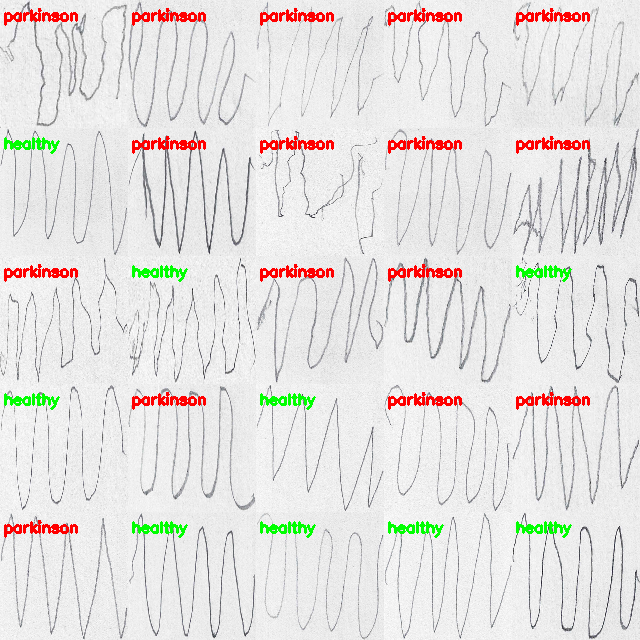

In [167]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

Karena akurasi data hanya 73%, maka ada beberapa yang salah detect. wave parkinson didetect healthy, atau sebaliknya. dapat dilihat pada gambar

Kesimpulan : dari ketiga metode yang telah digunakan, algoritma yang menghasilkan akurasi tertinggi adalah Random Forest dengan n_estimator 100, size image 128, dan feature extraxtion nya 'hog'

# No. 2

saya menambahkan data baru secara manual ke drive (untuk training)

In [214]:
dataset_dir = '/content/drive/My Drive/Dataset/Images'
dataset_dir2 = '/content/drive/My Drive/Dataset/Images/parkinsons/wave'

trainingPath = os.path.join(dataset_dir, "new_training_wave_")
testingPath = os.path.join(dataset_dir2, "testing")

#untuk data testing saya masih menggunakan drive dari pak tommy
#untuk data training sudah saya upload ke drive saya sendiri

In [215]:
def new_training(resize_image_size, extraction_method, kernel_type, estimator):
  (feature_train, label_train) = load_split(trainingPath, resize_image_size, extraction_method)
  (feature_test, label_test) = load_split(testingPath, resize_image_size, extraction_method)
  # print("Data loaded!")

  le = LabelEncoder()
  label_train = le.fit_transform(label_train)
  label_test = le.transform(label_test)

  #LOGISTIC REGRESSION
  logreg = LogisticRegression()
  logreg.fit(feature_train, label_train)
  predictions = logreg.predict(feature_test)
  # classification_report(label_test, predictions)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(feature_test, label_test))) # .score() -> Accuracy
  print("F1", f1_score(label_test, predictions, average="macro"))
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  #SVM kernel rbf
  classifier_rbf = SVC(kernel = kernel_type)
  classifier_rbf.fit(feature_train, label_train)
  predictions = classifier_rbf.predict(feature_test)
  # classification_report(label_test, predictions)
  print('Accuracy of SVM on test set: {:.2f}'.format(classifier_rbf.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro"))
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  #RANDOM FOREST
  model = RandomForestClassifier(n_estimators=estimator, random_state=10)
  model.fit(feature_train, label_train)
  predictions = model.predict(feature_test)
  # classification_report(label_test, predictions)
  print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(feature_test, label_test)))
  print("F1", f1_score(label_test, predictions, average="macro"))
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

In [216]:
new_training(128, 'hog', "rbf", 100)

Accuracy of logistic regression classifier on test set: 0.63
F1 0.6329254727474972
Precision 0.6339285714285714
Recall 0.6333333333333333
Accuracy of SVM on test set: 0.73
F1 0.7333333333333333
Precision 0.7333333333333333
Recall 0.7333333333333333
Accuracy of Random Forest on test set: 0.80
F1 0.8000000000000002
Precision 0.8
Recall 0.8


In [217]:
training(300, 'hog', "linear", 100)

Accuracy of logistic regression classifier on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7
Accuracy of SVM on test set: 0.70
F1 0.6969696969696968
Precision 0.7083333333333333
Recall 0.7
Accuracy of Random Forest on test set: 0.57
F1 0.5622895622895623
Precision 0.5694444444444444
Recall 0.5666666666666667


In [218]:
training(128, 'lbp', "poly", 150)

Accuracy of logistic regression classifier on test set: 0.57
F1 0.5622895622895623
Precision 0.5694444444444444
Recall 0.5666666666666667
Accuracy of SVM on test set: 0.60
F1 0.569377990430622
Precision 0.639751552795031
Recall 0.6
Accuracy of Random Forest on test set: 0.63
F1 0.6228571428571429
Precision 0.6499999999999999
Recall 0.6333333333333333


In [219]:
training(300, 'lbp', "linear", 200)

Accuracy of logistic regression classifier on test set: 0.60
F1 0.5982142857142858
Precision 0.6018099547511313
Recall 0.6
Accuracy of SVM on test set: 0.57
F1 0.5542857142857143
Precision 0.575
Recall 0.5666666666666667
Accuracy of Random Forest on test set: 0.67
F1 0.6666666666666666
Precision 0.6666666666666666
Recall 0.6666666666666666


Terdapat perbedaan setelah dilakukannya penambahan data training. 
Untuk size 128 dengan feature extraxtion 'hog' akurasi Random Forest meningkat menjadi 80% yang sebelumnya 73%. Namun untuk Logistic Regression menurun dari 67% menjadi 63%. Untuk SVC tetap sama. Nilai akurasi yang didapatkan untuk size 128 dan 300 serta 'hog' dan 'lbp' bervariasi untuk setiap metode. Nilai tertinggi yang saya dapatkan yaitu dengan metode Random Forest (80%) dengan size 128 dan feature extraction 'hog'. Ini mungkin disebabkan oleh data tambahan yang dibuat, bisa jadi ada beberapa gambar yang kurang jelas atau adanya sedikit bayangan, menyebabkan ketika di threshold objek tidak terdeteksi.